# GPLVM

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
%matplotlib notebook

import edward as ed
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from edward.models import Bernoulli, MultivariateNormalTriL, Normal
from edward.util import rbf
from observations import crabs
from sklearn.decomposition import PCA
import scipy.io

In [2]:
# def const(x):
#     x = tf.constant(x,dtype=tf.float32)
#     return x

# plt.subplots(2,3,figsize=(10,6))

# def build_toy_dataset(N, D, K, Ngrid = 100, prior_l=2, prior_sig_f=1, l=0.5, sig_f=1, sig_n=1e-1):
#     Nall = Ngrid + N
#     tgrid = np.linspace(-5, 5, num=N).reshape(-1,1)

#     sess = ed.get_session()
#     with sess.as_default():
#         Kprior = rbf(const(tgrid),lengthscale=const(prior_l),variance=const(prior_sig_f)).eval()

#     z_mu = np.zeros(N)
#     z_cov = Kprior + 1e-10*np.eye(N)
#     z = np.random.multivariate_normal(z_mu, z_cov).T.reshape(-1,1)
#     zgrid = np.linspace(z.min(), z.max(), num=Ngrid).reshape(-1,1)
#     zall = np.vstack((z,zgrid))

#     plt.subplot(2,3,1)
#     plt.imshow(Kprior)
#     plt.colorbar()
#     plt.subplot(2,3,2)
#     plt.plot(z)

#     with sess.as_default():
#         Kzall = rbf(const(zall),lengthscale=const(l),variance=const(sig_f)).eval()

#     Kz = Kzall[:N,:N]
#     xall = np.random.multivariate_normal(np.zeros(Nall), Kzall, D).T
#     x = xall[:N,:]
#     xgrid = xall[N:,:]
#     noise = np.random.randn(x.shape[0],x.shape[1])
#     x = x + sig_n*noise

#     plt.subplot(2,3,4)
#     plt.imshow(Kz)
#     plt.colorbar()
#     plt.subplot(2,3,5)
#     plt.imshow(np.cov(x))
#     plt.colorbar()
#     plt.subplot(2,3,6)
#     plt.plot(xgrid[:,:5])

#     return x,xgrid,z,zgrid,tgrid,Kz,Kprior

# N = 500  # number of data points, number of time points
# D = 200  # data dimensionality, number of neurons
# K = 1  # latent dimensionality

# x_true, xgrid, z_true, zgrid, tgrid, Kz_true, Kprior_true = build_toy_dataset(N, D, K)

# print("Number of data points N={}".format(N))
# print("Number of features D={}".format(D))
# print("Number of latent dimensions K={}".format(K))

# pca = PCA(n_components=1)
# z_init = pca.fit_transform(x_true)

# # visualize the covariance of Z
# plt.subplot(2,3,3)
# plt.plot(z_init)

# scipy.io.savemat('syn.mat',mdict={'x_true':x_true, 'xgrid':xgrid, 'z_true':z_true, 'zgrid':zgrid, 
#                                   'tgrid':tgrid, 'Kz_true':Kz_true, 'Kprior_true':Kprior_true})

<IPython.core.display.Javascript object>


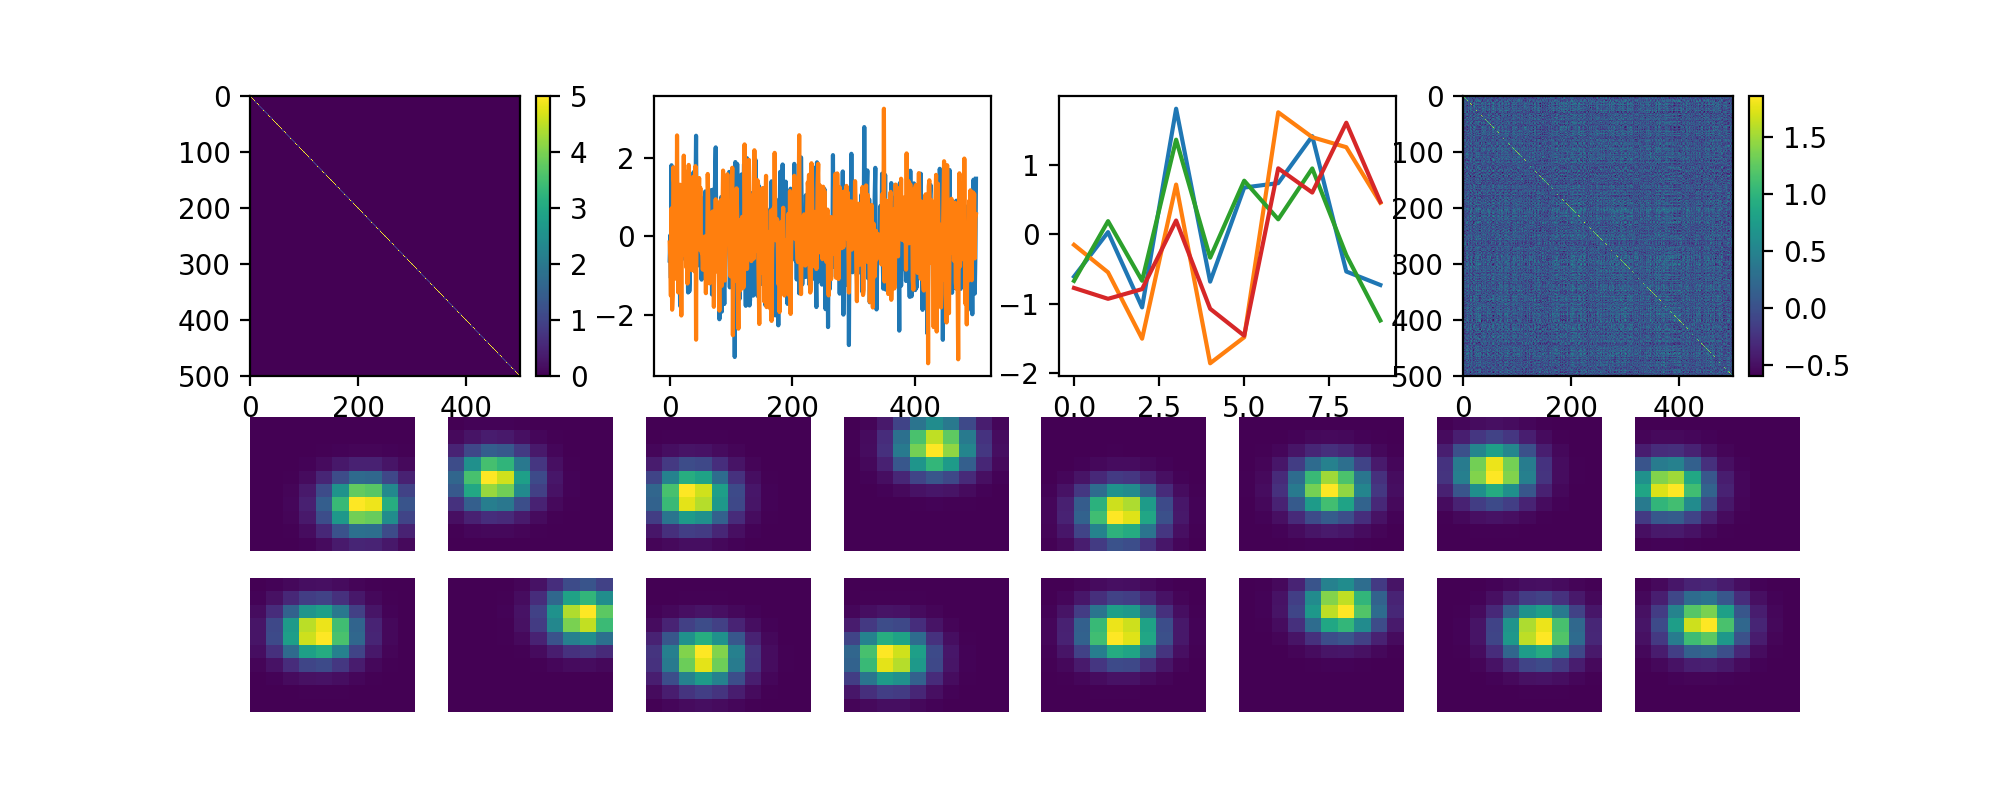

Number of data points N=500
Number of features D=100
Number of latent dimensions K=2


In [3]:
data = scipy.io.loadmat('syn2d.mat')
x_true = data['x_true']
xgrid = data['xgrid']
z_true = data['z_true']
zgrid = data['zgrid']
tgrid = data['tgrid']
Kprior_true = data['Kprior_true']

N = x_true.shape[0]
D = x_true.shape[1]
K = z_true.shape[1]
Ngrid = int(np.sqrt(xgrid.shape[0]))

pca = PCA(n_components=K)
z_init = pca.fit_transform(x_true)

plt.subplots(4,8,figsize=(10,4))
plt.subplot(2,4,1)
plt.imshow(Kprior_true,aspect='auto')
plt.colorbar()
plt.subplot(2,4,2)
plt.plot(z_true)

def align_z(x,z):
    wgt = np.linalg.lstsq(x-x.mean(), z-z.mean())[0]   
    xx = np.dot(x-x.mean(),wgt)
    return xx

# visualize the covariance of Z
plt.subplot(2,4,3)
plt.plot(z_true[:10,:])
plt.plot(align_z(z_init,z_true)[:10,:])

extent = z_true[:,0].min(), z_true[:,0].max(), z_true[:,1].min(), z_true[:,1].max()
plt.subplot(2,4,4)
plt.imshow(np.cov(x_true),aspect='auto')
plt.colorbar()

ii = np.random.randint(0,D,16)

for i in range(16):
    plt.subplot(4,8,i+17)
    plt.imshow(xgrid[:,ii[i]].reshape(Ngrid,Ngrid),extent=extent,aspect='auto')
    plt.axis('off')


t_train = tgrid
x_train = x_true

print("Number of data points N={}".format(N))
print("Number of features D={}".format(D))
print("Number of latent dimensions K={}".format(K))

<IPython.core.display.Javascript object>


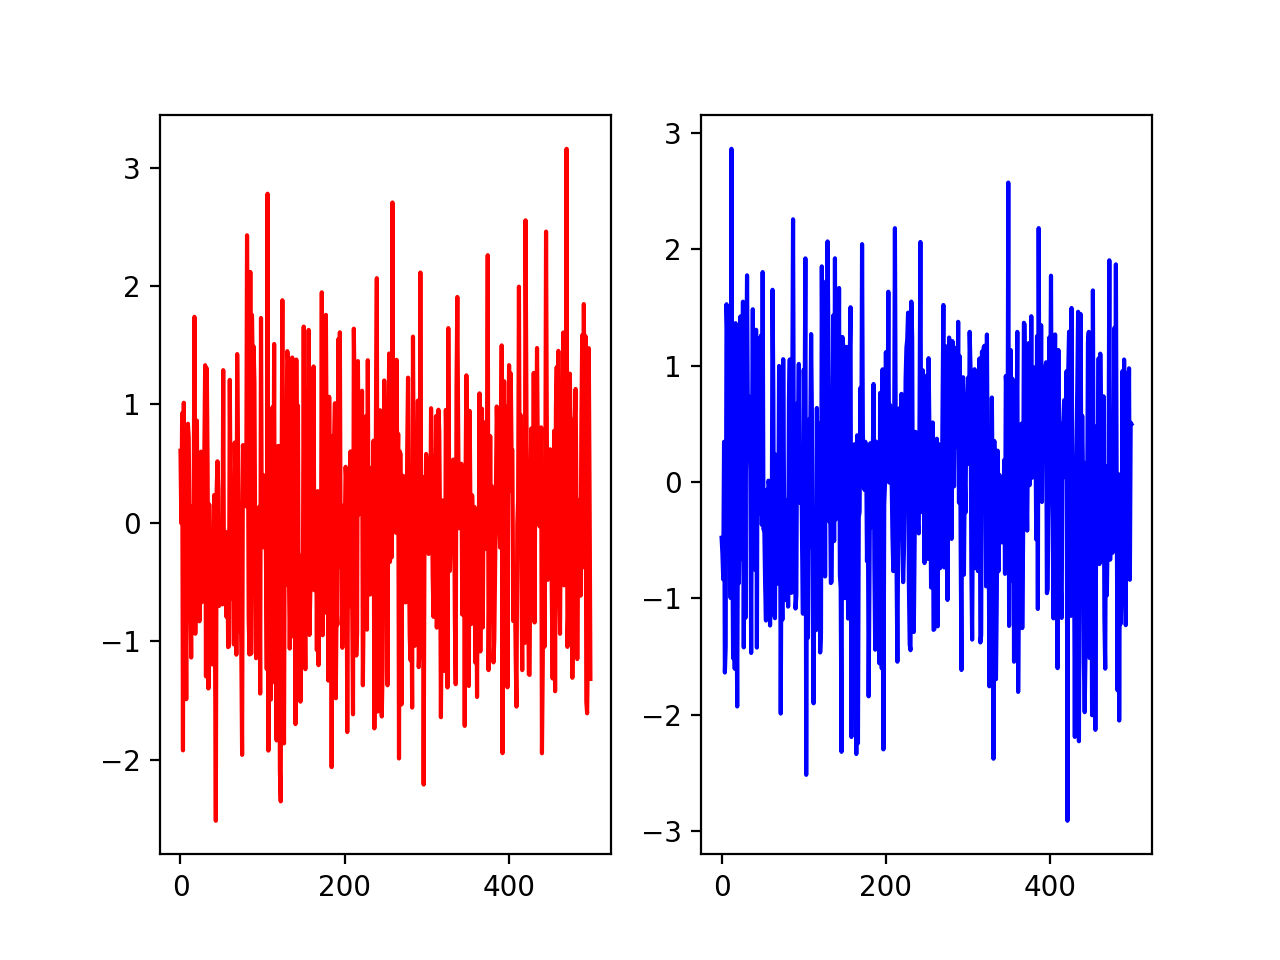

   1/5000 [  0%]                                ETA: 7429s | Loss: 86189.734
 sig_f_est= 0.904837430 sig_n_est= 1.105170965 l_est= 9.098637581


/Users/anqiwu/anaconda/envs/vae-tutorial/lib/python3.6/site-packages/matplotlib/backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


 100/5000 [  2%]                                ETA: 239s | Loss: 73759.227 
 sig_f_est= 0.421882063 sig_n_est= 1.002341390 l_est= 1.591546297
 200/5000 [  4%] █                              ETA: 187s | Loss: 73872.281
 sig_f_est= 0.423036963 sig_n_est= 1.005183697 l_est= 1.587810755
 300/5000 [  6%] █                              ETA: 170s | Loss: 73789.719
 sig_f_est= 0.423495770 sig_n_est= 0.998564720 l_est= 1.558714747
 400/5000 [  8%] ██                             ETA: 158s | Loss: 73800.812
 sig_f_est= 0.429030240 sig_n_est= 0.995732546 l_est= 1.528125763
 500/5000 [ 10%] ███                            ETA: 152s | Loss: 73807.422
 sig_f_est= 0.427028716 sig_n_est= 1.001356244 l_est= 1.525422335
 600/5000 [ 12%] ███                            ETA: 148s | Loss: 73770.719
 sig_f_est= 0.423040271 sig_n_est= 0.997053683 l_est= 1.529378533
 700/5000 [ 14%] ████                           ETA: 142s | Loss: 73788.328
 sig_f_est= 0.428036302 sig_n_est= 0.995445728 l_est= 1.487045884
 800/

In [8]:
def const(x):
    x = tf.constant(x,dtype=tf.float32)
    return x

sig_f = tf.Variable(np.log(1), dtype=tf.float32)
l = tf.Variable(np.log(10), dtype=tf.float32)
sig_n = tf.Variable(np.log(1), dtype=tf.float32)
# sig_f = const(np.log(1))
# l = const(np.log(0.5))
# sig_n = const(np.log(1))
prior_sig_n = const(np.log(1))

if 1:
    z = Normal(loc=tf.zeros([K, N]), scale=tf.ones([K, N])*tf.exp(prior_sig_n))
    Kernel = rbf(tf.transpose(z),lengthscale=tf.exp(l),variance=tf.exp(sig_f))+tf.exp(sig_n)*tf.eye(N)
    x = MultivariateNormalTriL(loc=tf.zeros([D, N]), scale_tril=tf.cholesky(Kernel))
else:
    sig_n_u = const(np.log(0.01))
    M = 50
    u = tf.Variable(tf.random_normal([K,M])*1e-2, dtype=tf.float32)

    z = Normal(loc=tf.zeros([K, N]), scale=tf.ones([K, N])*tf.exp(prior_sig_n))
    Kernel_uu = rbf(tf.transpose(u),lengthscale=tf.exp(l),variance=tf.exp(sig_f))+tf.exp(sig_n_u)*tf.eye(M)
    Kernel_zu = rbf(tf.transpose(z),tf.transpose(u),lengthscale=tf.exp(l),variance=tf.exp(sig_f))
    Kernel = tf.matmul(Kernel_zu,tf.matmul(tf.matrix_inverse(Kernel_uu),tf.transpose(Kernel_zu)))+tf.exp(sig_n)*tf.eye(N)
    x = MultivariateNormalTriL(loc=tf.zeros([D, N]), scale_tril=tf.cholesky(Kernel))

qz = Normal(loc=tf.Variable(tf.ones([K, N])*1e-2),
            scale=tf.square(tf.Variable(tf.ones([K, N])*1e-2)))
# qz = Normal(loc=tf.Variable(z_init.T,dtype=tf.float32),
#             scale=tf.square(tf.Variable(tf.ones([K, N])*1e-2)))

# inference = ed.KLqp({z: qz}, data={x: x_train.T})
# inference.run(n_iter=2000, n_print=10, n_samples=10)

inference = ed.KLqp({z: qz}, data={x: x_train.T})
inference.initialize(n_print=100, n_iter=5000)
tf.global_variables_initializer().run()
f, (ax1, ax2) = plt.subplots(1, 2)
for t in range(inference.n_iter):
    info_dict = inference.update()
    inference.print_progress(info_dict)

    if t % inference.n_print == 0:
        sess = ed.get_session()
        sig_f_est, sig_n_est, l_est = sess.run([sig_f,sig_n,l],feed_dict={x: x_train.T})
        print("\n sig_f_est=", "{:.9f}".format(np.exp(sig_f_est)), "sig_n_est=", "{:.9f}".format(np.exp(sig_n_est))
              , "l_est=", "{:.9f}".format(np.exp(l_est)))

        # CRITICISM
        ax1.clear()
        ax2.clear()

        ax1.set_title('qz_mean')
        ax2.set_title('qz_var')
        
        line1 = ax1.plot(qz.mean().eval()[0],'r')
        line2 = ax2.plot(qz.mean().eval()[1],'b')
        plt.draw()
        
        # to visualize the result and improvement
        try:
            plt.pause(0.5)
        except Exception:
            pass
        
        try:
            ax1.lines.remove(line1[0])
            ax2.lines.remove(line2[0])
            plt.show()
        except Exception as e:
            pass

ax1.clear()
ax2.clear()
line1 = ax1.plot(qz.mean().eval()[0],'r')
line2 = ax2.plot(qz.mean().eval()[1],'b')            
            

sig_f_est= 0.428191215 sig_n_est= 0.992258430 l_est= 1.384296298


<IPython.core.display.Javascript object>


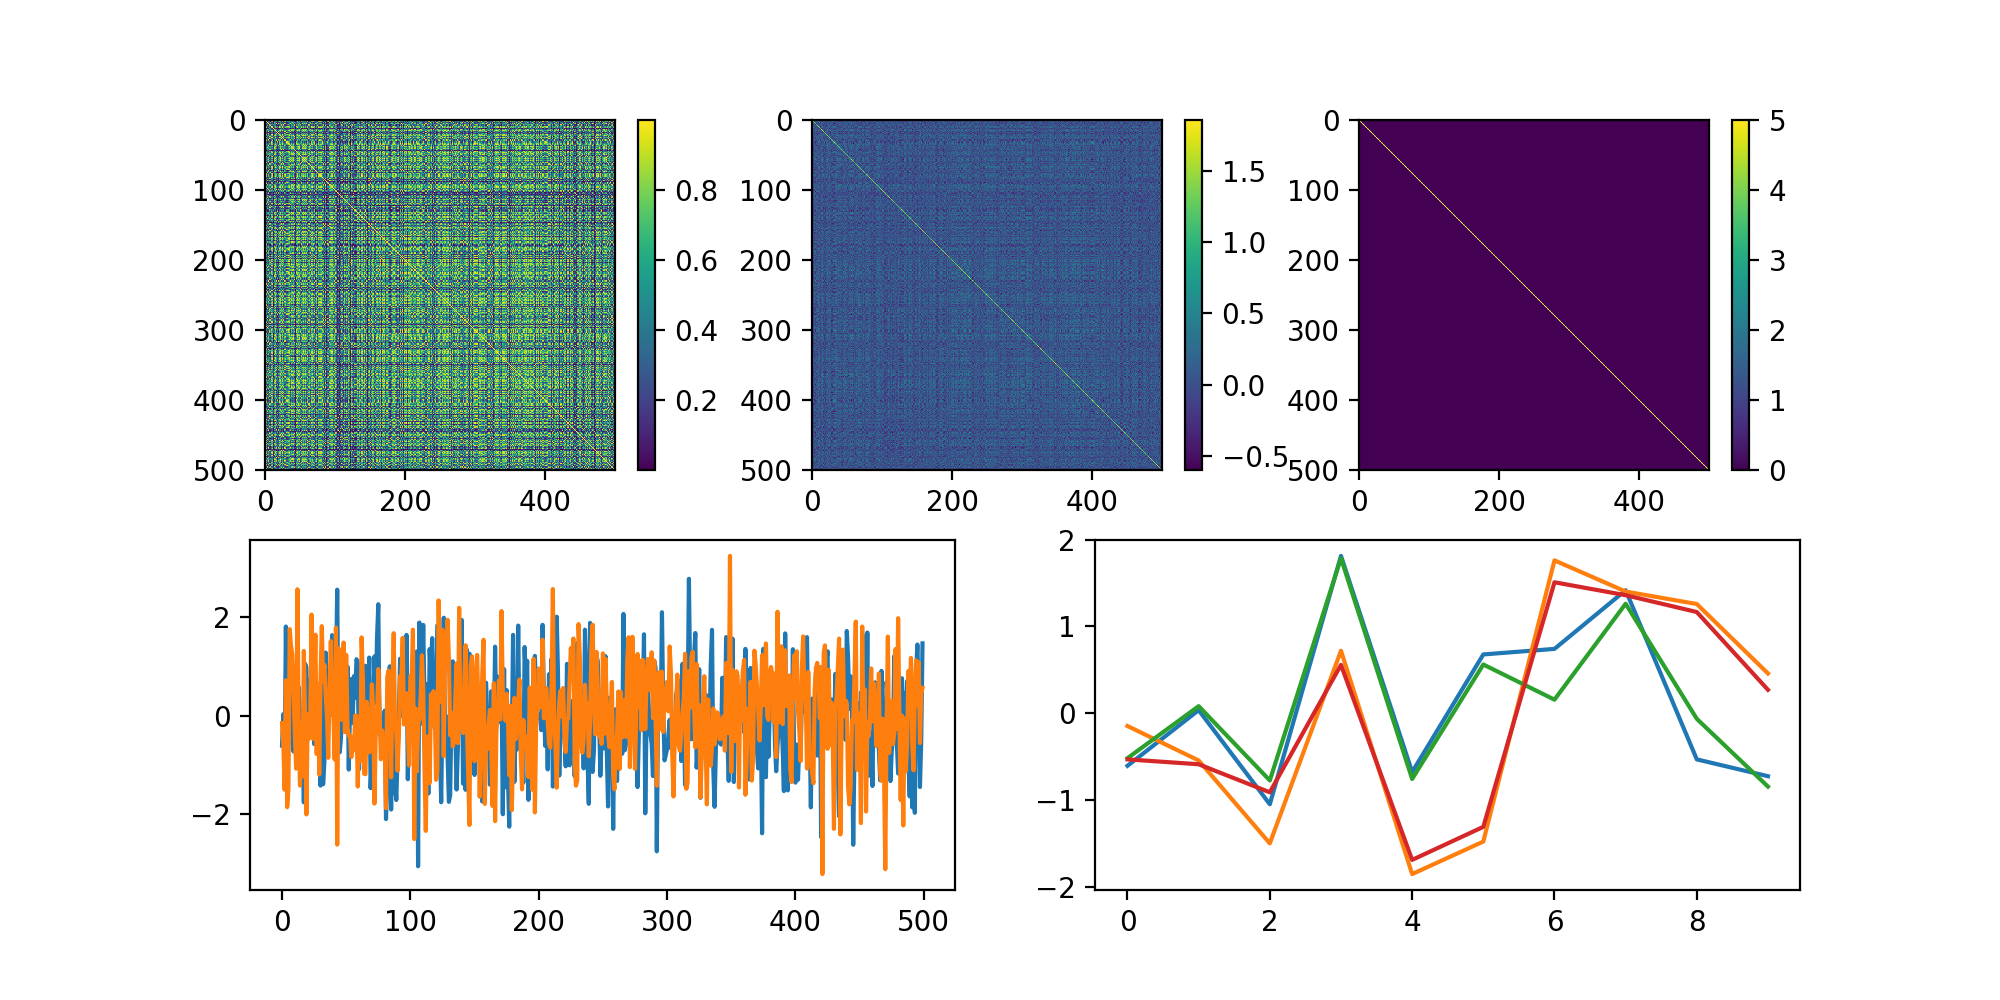

In [9]:
sess = ed.get_session()
qz_mean, qz_var, sig_f_est, sig_n_est, l_est = sess.run([qz.mean(),qz.variance(),sig_f,sig_n,l],feed_dict={x: x_train.T})
print("sig_f_est=", "{:.9f}".format(np.exp(sig_f_est)), "sig_n_est=", "{:.9f}".format(np.exp(sig_n_est))
      , "l_est=", "{:.9f}".format(np.exp(l_est)))
qz_mean = qz_mean.T
Kz = rbf(const(qz_mean),lengthscale=tf.exp(l_est),variance=tf.exp(sig_f_est)).eval()
Kz = Kz/np.amax(Kz)

plt.subplots(2,3,figsize=(10,5))
plt.subplot(2,3,1)
plt.imshow(Kz)
plt.colorbar()
plt.subplot(2,3,2)
plt.imshow(np.cov(x_true))
plt.colorbar()
plt.subplot(2,3,3)
plt.imshow(Kprior_true)
plt.colorbar()
plt.subplot(2,2,3)
plt.plot(z_true)
plt.subplot(2,2,4)
plt.plot(align_z(z_true,z_true)[:10,:])
plt.plot(align_z(qz_mean,z_true)[:10,:])


[31  2 43 46 18 18 80 56]


<IPython.core.display.Javascript object>


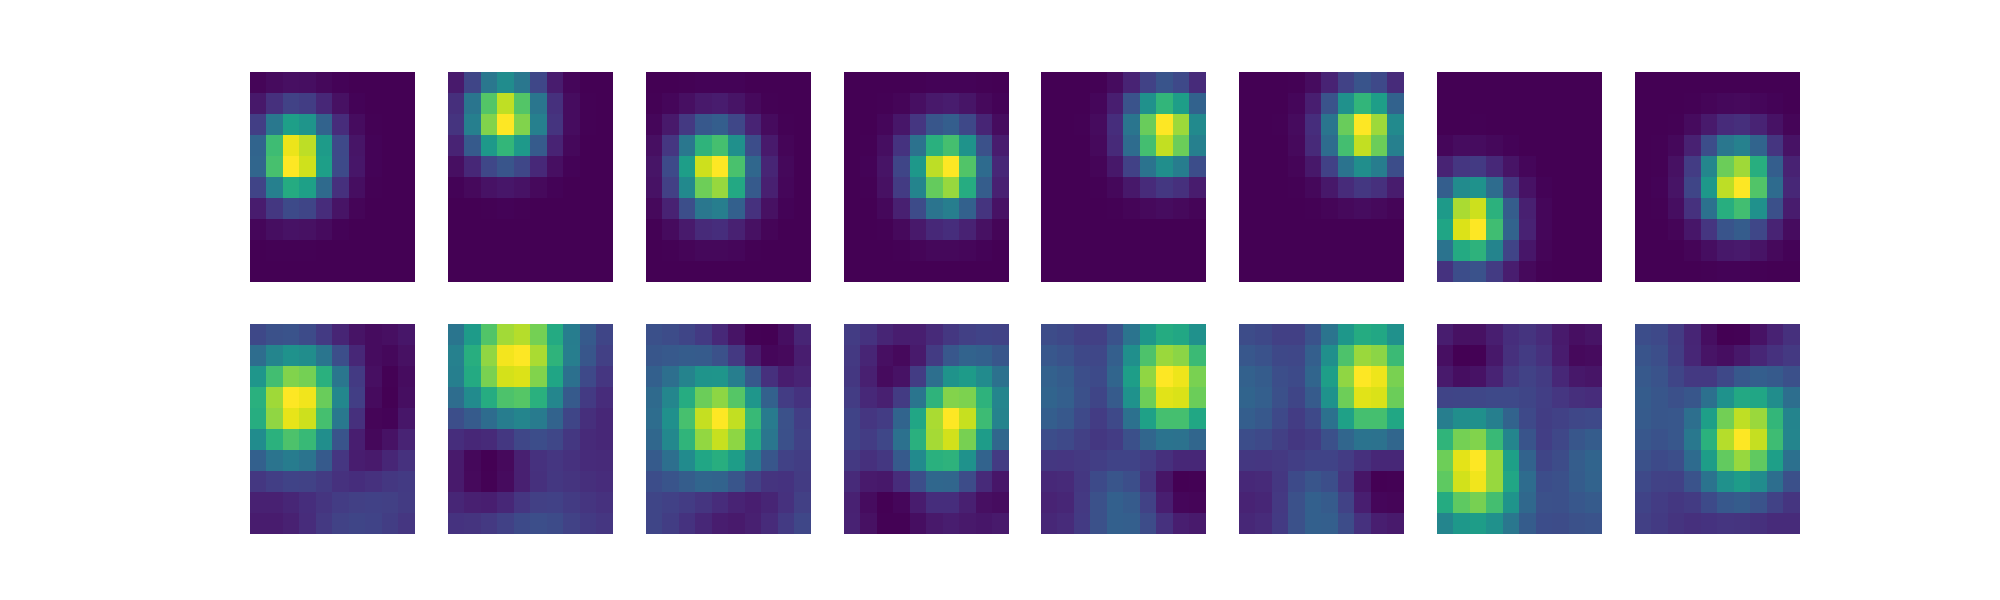

In [10]:
z_est1 = align_z(qz_mean,z_true)
Kxx = rbf(const(z_est1),lengthscale=tf.exp(l_est),variance=tf.exp(sig_f_est)).eval()
Kxx_noise = Kxx + np.exp(sig_n_est)*np.eye(N)
Ky = Kxx @ x_true
invKxx = np.linalg.inv(Kxx_noise)
f_tc = invKxx @ Ky

zgridx,zgridy = np.meshgrid(np.linspace(z_est1[:,0].min(), z_est1[:,0].max(), num=Ngrid), 
                            np.linspace(z_est1[:,1].min(), z_est1[:,1].max(), num=Ngrid))
zgrid_est = np.vstack((zgridx.reshape(1,-1),zgridy.reshape(1,-1))).T
Kgx = rbf(const(zgrid_est),const(z_est1),lengthscale=tf.exp(l_est),variance=tf.exp(sig_f_est)).eval()
xgrid_est = Kgx @ invKxx @ f_tc

extent = z_true[:,0].min(), z_true[:,0].max(), z_true[:,1].min(), z_true[:,1].max()
extent_est = z_est1[:,0].min(), z_est1[:,0].max(), z_est1[:,1].min(), z_est1[:,1].max()

ii = np.random.randint(0,D,8)
print(ii)

plt.subplots(2,8,figsize=(10,3))
for i in range(8):
    plt.subplot(2,8,i+1)
    plt.imshow(xgrid[:,ii[i]].reshape(Ngrid,Ngrid),extent=extent,aspect='auto')
    plt.axis('off')
    plt.subplot(2,8,i+9)
    plt.imshow(xgrid_est[:,ii[i]].reshape(Ngrid,Ngrid),extent=extent_est,aspect='auto')
    plt.axis('off')    

<IPython.core.display.Javascript object>


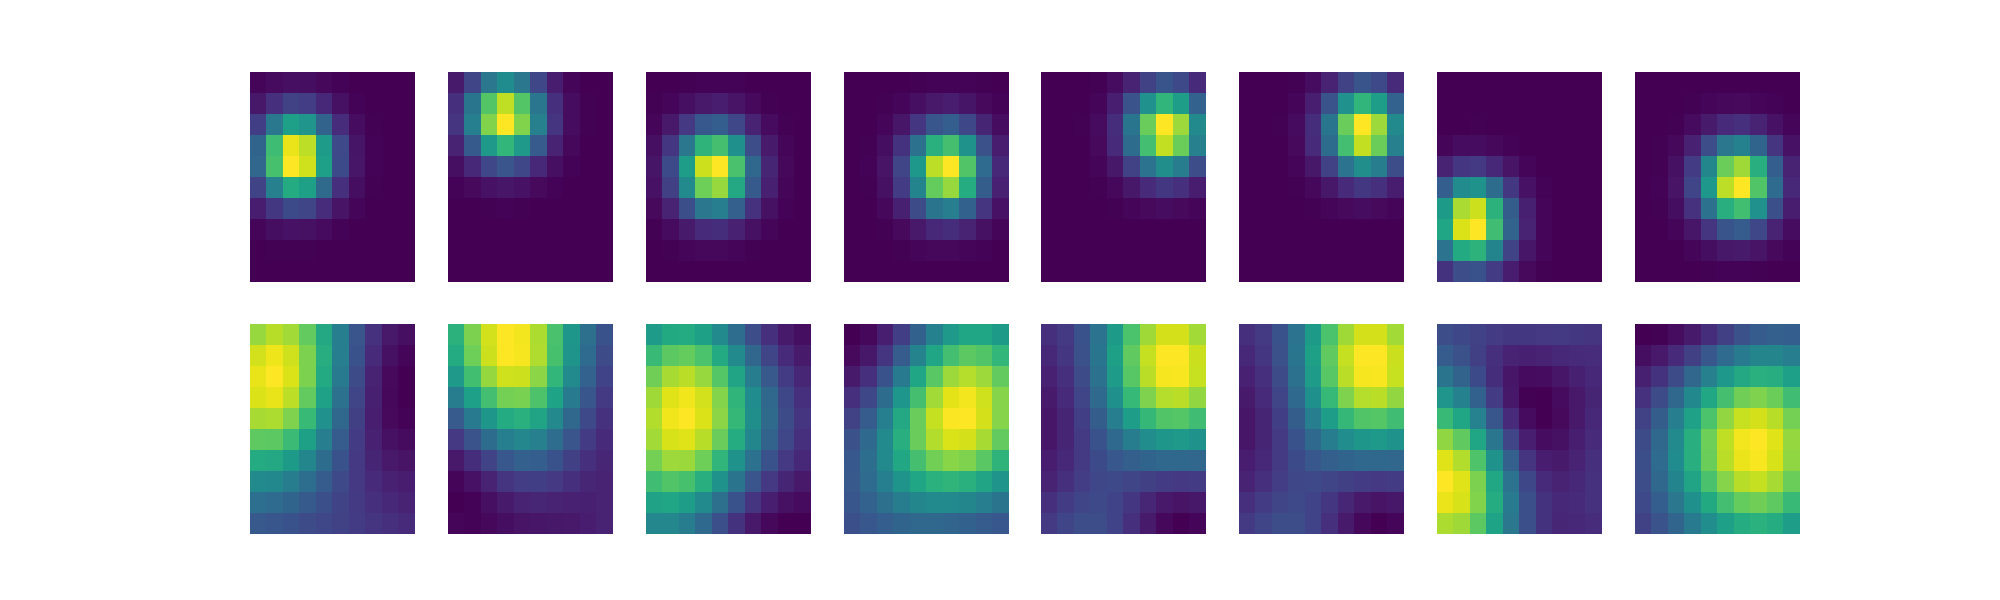

In [11]:
z_est1 = align_z(z_init,z_true)
Kxx = rbf(const(z_est1),lengthscale=tf.exp(l_est),variance=tf.exp(sig_f_est)).eval()
Kxx_noise = Kxx + np.exp(sig_n_est)*np.eye(N)
Ky = Kxx @ x_true
invKxx = np.linalg.inv(Kxx_noise)
f_tc = invKxx @ Ky

zgridx,zgridy = np.meshgrid(np.linspace(z_est1[:,0].min(), z_est1[:,0].max(), num=Ngrid), 
                            np.linspace(z_est1[:,1].min(), z_est1[:,1].max(), num=Ngrid))
zgrid_est = np.vstack((zgridx.reshape(1,-1),zgridy.reshape(1,-1))).T
Kgx = rbf(const(zgrid_est),const(z_est1),lengthscale=tf.exp(l_est),variance=tf.exp(sig_f_est)).eval()
xgrid_est = Kgx @ invKxx @ f_tc

extent = z_true[:,0].min(), z_true[:,0].max(), z_true[:,1].min(), z_true[:,1].max()
extent_est = z_est1[:,0].min(), z_est1[:,0].max(), z_est1[:,1].min(), z_est1[:,1].max()

# ii = np.random.randint(0,D,8)
# print(ii)

plt.subplots(2,8,figsize=(10,3))
for i in range(8):
    plt.subplot(2,8,i+1)
    plt.imshow(xgrid[:,ii[i]].reshape(Ngrid,Ngrid),extent=extent,aspect='auto')
    plt.axis('off')
    plt.subplot(2,8,i+9)
    plt.imshow(xgrid_est[:,ii[i]].reshape(Ngrid,Ngrid),extent=extent_est,aspect='auto')
    plt.axis('off')    